<a href="https://colab.research.google.com/github/Hwang-Jonghyeon/Section-Project/blob/main/S2_PJ__%ED%99%A9%EC%A2%85%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

호텔 예약 예측을 위한 머신러닝


In [3]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
hotel = pd.read_csv('/content/hotel_bookings.csv')

hotel.shape

(119390, 32)

In [6]:
hotel.isnull().sum()


hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [7]:
del hotel['company']
del hotel['arrival_date_week_number']
del hotel['country']

In [8]:
hotel['agent'].value_counts()
hotel['agent'].unique()

array([ nan, 304., 240., 303.,  15., 241.,   8., 250., 115.,   5., 175.,
       134., 156., 243., 242.,   3., 105.,  40., 147., 306., 184.,  96.,
         2., 127.,  95., 146.,   9., 177.,   6., 143., 244., 149., 167.,
       300., 171., 305.,  67., 196., 152., 142., 261., 104.,  36.,  26.,
        29., 258., 110.,  71., 181.,  88., 251., 275.,  69., 248., 208.,
       256., 314., 126., 281., 273., 253., 185., 330., 334., 328., 326.,
       321., 324., 313.,  38., 155.,  68., 335., 308., 332.,  94., 348.,
       310., 339., 375.,  66., 327., 387., 298.,  91., 245., 385., 257.,
       393., 168., 405., 249., 315.,  75., 128., 307.,  11., 436.,   1.,
       201., 183., 223., 368., 336., 291., 464., 411., 481.,  10., 154.,
       468., 410., 390., 440., 495., 492., 493., 434.,  57., 531., 420.,
       483., 526., 472., 429.,  16., 446.,  34.,  78., 139., 252., 270.,
        47., 114., 301., 193., 182., 135., 350., 195., 352., 355., 159.,
       363., 384., 360., 331., 367.,  64., 406., 16

In [9]:
hotel['agent'].fillna(0,inplace =True)

In [10]:
hotel.drop_duplicates(inplace=True)
#중복값은 하나 남기고 제거

In [11]:
hotel = hotel.dropna()
hotel

#hotel - 호텔 타입
#is_canceled - 예약 유무
#lead_time - 예약 유무까지 걸린 시간
#arrival_date_year , arrival_date_month , arrival_date_day_of_month 호텔 예약 접수
#reservation_status_date 호텔 예약 날짜
#adults , children , babies
#meal 끼니
#country 국가

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,1,0,0,2,0.0,0,BB,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,1,0,0,2,0.0,0,BB,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,1,0,1,1,0.0,0,BB,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,1,0,1,1,0.0,0,BB,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,1,0,2,2,0.0,0,BB,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,30,2,5,2,0.0,0,BB,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,31,2,5,3,0.0,0,BB,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,31,2,5,2,0.0,0,BB,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,31,2,5,2,0.0,0,BB,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [12]:
hotel.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

In [13]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85624 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           85624 non-null  object 
 1   is_canceled                     85624 non-null  int64  
 2   lead_time                       85624 non-null  int64  
 3   arrival_date_year               85624 non-null  int64  
 4   arrival_date_month              85624 non-null  object 
 5   arrival_date_day_of_month       85624 non-null  int64  
 6   stays_in_weekend_nights         85624 non-null  int64  
 7   stays_in_week_nights            85624 non-null  int64  
 8   adults                          85624 non-null  int64  
 9   children                        85624 non-null  float64
 10  babies                          85624 non-null  int64  
 11  meal                            85624 non-null  object 
 12  market_segment                 

In [14]:
hotel['children'] = hotel['children'].astype(int)
hotel['reservation_status_date'] = hotel['reservation_status_date'].astype('datetime64[ns]')

In [15]:
hotel.arrival_date_month.unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [16]:
hotel.customer_type.unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [17]:
month = {
         'January':1,
         'February':2,
         'March':3,
         'April':4,
         'May':5,
         'June':6,
         'July':7,
         'August':8,
         'September':9,
         'October':10,
         'November':11,
         'December':12
         }

In [18]:
hotel['arrival_date_month'] = hotel['arrival_date_month'].map(month)

In [19]:
hotel.is_canceled.value_counts(normalize=True)
#호텔 예약률 (1 = 취소)

0    0.719646
1    0.280354
Name: is_canceled, dtype: float64

Text(0.5, 1.0, 'The percentage of visits to hotels')

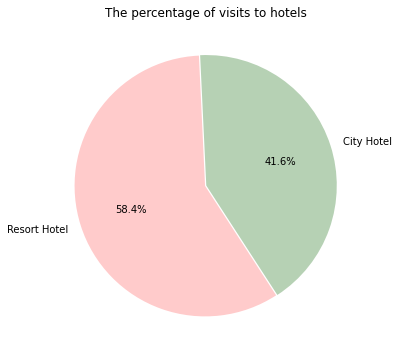

In [20]:
hotel_visit = hotel[hotel['is_canceled'] == 0]
explode = [0.005,0.005]
colors = ['#ffcbcb','#b6d1b4']

plt.figure(figsize=(18,6))
plt.pie(hotel_visit['hotel'].value_counts(), 
        labels=hotel_visit['hotel'].unique(),
        autopct='%.1f%%',
        counterclock=False,
        startangle=303,
        explode = explode,
        colors = colors)

plt.title('The percentage of visits to hotels')

In [21]:
hotel_visit['visit_year'] = hotel_visit['reservation_status_date'].dt.year
hotel_visit['visit_month'] = hotel_visit['reservation_status_date'].dt.month
hotel_visit['visit_day'] = hotel_visit['reservation_status_date'].dt.day


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [22]:
resort = hotel_visit[hotel_visit['hotel'] == 'Resort Hotel']
city = hotel_visit[hotel_visit['hotel'] == 'City Hotel']

In [23]:

def reservation_y(ry):
  ry = ry['arrival_date_year'].value_counts().reset_index()
  ry.columns = ['year','visitor']
  ry = ry.sort_values(by=['year'])
  return ry

def reservation_m(rm):
  rm = rm['arrival_date_month'].value_counts().reset_index()
  rm.columns = ['month','visitor']
  rm = rm.sort_values(by=['month'])
  return rm

def reservation_d(rd):
  rd = rd['arrival_date_day_of_month'].value_counts().reset_index()
  rd.columns = ['day','visitor']
  rd = rd.sort_values(by=['day'])
  return rd

def visit_y(vy):
  vy = vy['visit_year'].value_counts().reset_index()
  vy.columns = ['year','visitor']
  vy = vy.sort_values(by=['year'])
  return vy

def visit_m(vm):
  vm = vm['visit_month'].value_counts().reset_index()
  vm.columns = ['month','visitor']
  vm = vm.sort_values(by=['month'])
  return vm

def visit_d(vd):
  vd = vd['visit_day'].value_counts().reset_index()
  vd.columns = ['day','visitor']
  vd = vd.sort_values(by=['day'])
  return vd

resort_ry = reservation_y(resort)
city_ry = reservation_y(city) 
resort_rm = reservation_m(resort)
city_rm = reservation_m(city)
resort_rd = reservation_d(resort)
city_rd = reservation_d(city)
resort_vy = visit_y(resort)
city_vy = visit_y(city)
resort_vm = visit_m(resort)
city_vm = visit_m(city)
resort_vd = visit_d(resort)
city_vd = visit_d(city)

comb_ry = resort_ry.merge(city_ry, on = 'year')
comb_ry.columns = ['year', 'resort', 'city']
comb_ry= comb_ry.set_index('year')

comb_rm = resort_rm.merge(city_rm, on = 'month')
comb_rm.columns = ['month', 'resort', 'city']
comb_rm= comb_rm.set_index('month')

comb_rd = resort_rd.merge(city_rd, on = 'day')
comb_rd.columns = ['day', 'resort', 'city']
comb_rd= comb_rd.set_index('day')

comb_vy = resort_vy.merge(city_vy, on = 'year')
comb_vy.columns = ['year', 'resort', 'city']
comb_vy= comb_vy.set_index('year')

comb_vm = resort_vm.merge(city_vm, on = 'month')
comb_vm.columns = ['month', 'resort', 'city']
comb_vm= comb_vm.set_index('month')

comb_vd = resort_vd.merge(city_vd, on = 'day')
comb_vd.columns = ['day', 'resort', 'city']
comb_vd= comb_vd.set_index('day')

In [24]:
comb_ry

,resort,city
year,,
2015,5398,4807
2016,12039,18239
2017,8187,12949


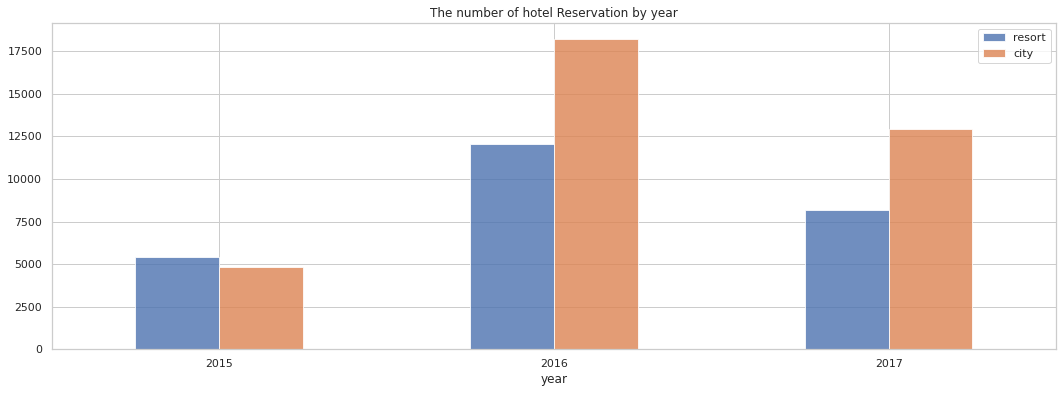

In [25]:
sns.set_theme(style="whitegrid")

comb_ry.plot(kind = 'bar',
             figsize=(18,6),
             rot = 0,
             alpha = 0.8)
plt.title('The number of hotel Reservation by year')
plt.show()
#연도별 호텔 예약 수

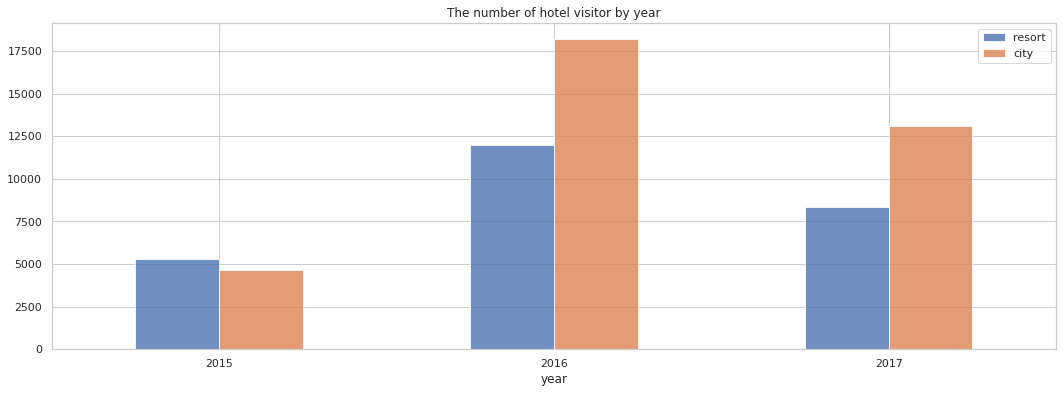

In [26]:
comb_vy.plot(kind = 'bar',
             figsize=(18,6),
             rot = 0,
             alpha = 0.8)
plt.title('The number of hotel visitor by year')
plt.show()
#연도별 호텔 방문객 수

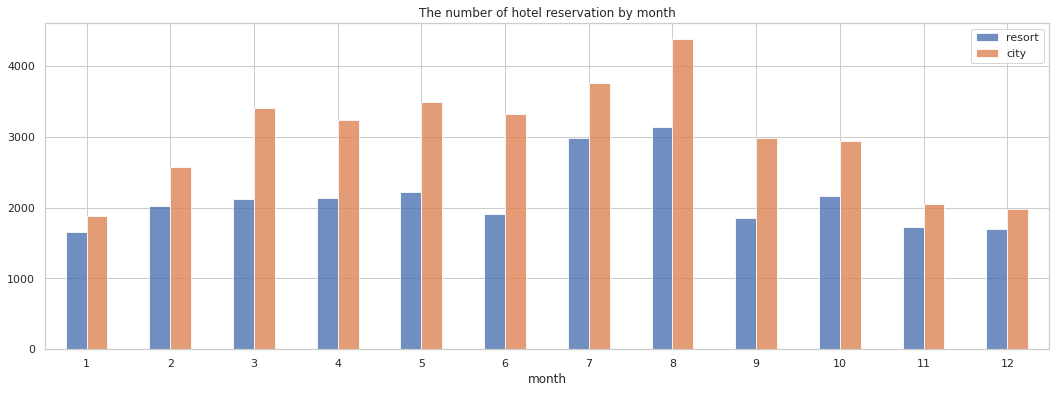

In [27]:
comb_rm.plot(kind = 'bar',
             figsize=(18,6),
             rot = 0,
             alpha = 0.8)
plt.title('The number of hotel reservation by month')
plt.show()
#월별 호텔 예약 시점 수

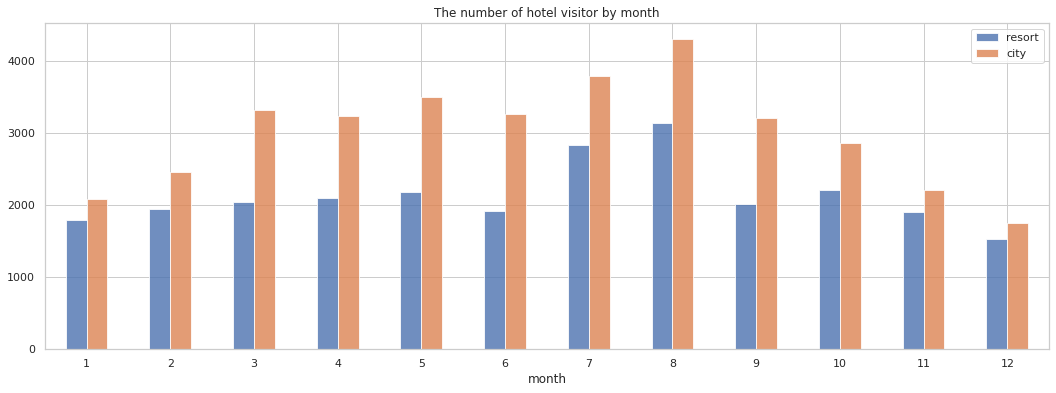

In [28]:
comb_vm.plot(kind = 'bar',
             figsize=(18,6),
             rot = 0,
             alpha = 0.8)
plt.title('The number of hotel visitor by month')
plt.show()
#월별 호텔 방문 시점 수

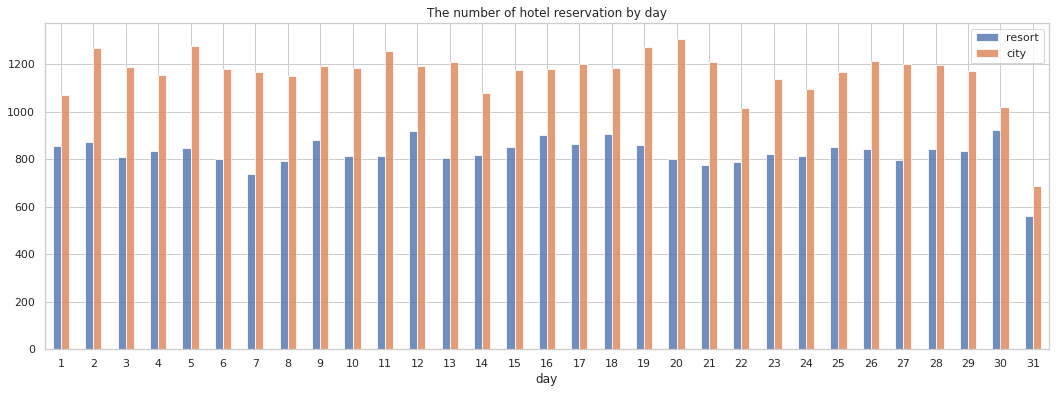

In [29]:
comb_rd.plot(kind = 'bar',
             figsize=(18,6),
             rot = 0,
             alpha = 0.8)
plt.title('The number of hotel reservation by day')
plt.show()
#일별 호텔 예약 시점 수

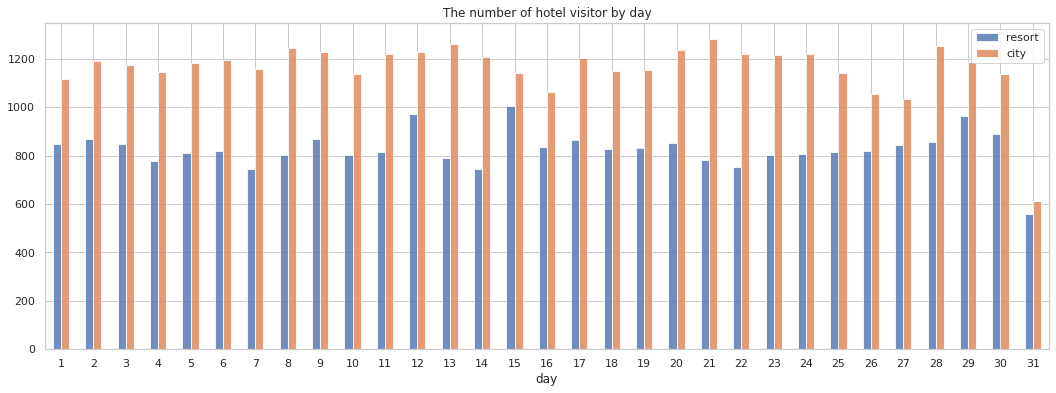

In [30]:
comb_vd.plot(kind = 'bar',
             figsize=(18,6),
             rot = 0,
             alpha = 0.8)
plt.title('The number of hotel visitor by day')
plt.show()
#일별 호텔 방문 시점 수

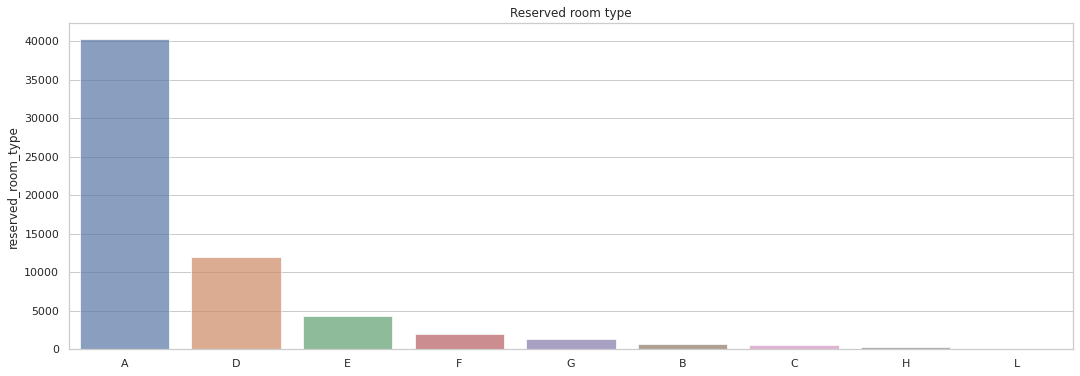

In [31]:
plt.figure(figsize=(18,6))
sns.barplot(x=hotel_visit.reserved_room_type.value_counts().index,
            y=hotel_visit.reserved_room_type.value_counts(),
            data = hotel_visit,
            alpha = 0.7)
plt.title('Reserved room type')
plt.show()
#예약한 방의 타입

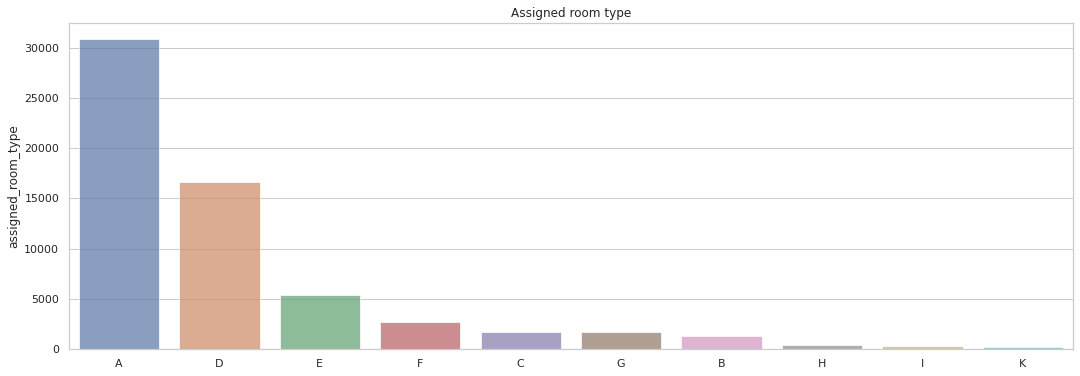

In [32]:
plt.figure(figsize=(18,6))
sns.barplot(x=hotel_visit.assigned_room_type.value_counts().index,
            y=hotel_visit.assigned_room_type.value_counts(),
            data = hotel_visit,
            alpha = 0.7)
plt.title('Assigned room type')
plt.show()
#배정된 방의 타입

In [33]:
resort_price = resort.groupby(['visit_month'])['adr'].mean().reset_index()
city_price = city.groupby(['visit_month'])['adr'].mean().reset_index()

com_price = resort_price.merge(city_price, on = 'visit_month')
com_price.columns = ['visit_month','resort_price','city_price']
com_price = com_price.set_index('visit_month')

com_price

,resort_price,city_price
visit_month,,
1,60.711231,88.318511
2,53.281352,87.654974
3,55.725305,89.973529
4,74.575594,111.903826
5,77.158147,125.547240
6,105.200753,121.021632
7,144.020300,120.127395
8,185.097833,123.794372
9,113.949177,115.982559


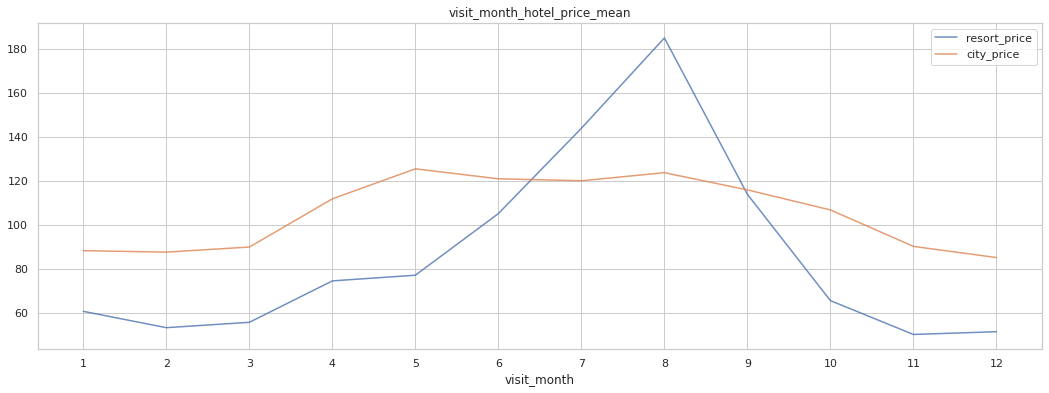

In [34]:
com_price.plot(kind = 'line',
             figsize=(18,6),
             alpha = 0.8)
plt.xticks(range(1,13,1))
plt.title('visit_month_hotel_price_mean')
plt.show()
#방문 시점 호텔 price mean (month)

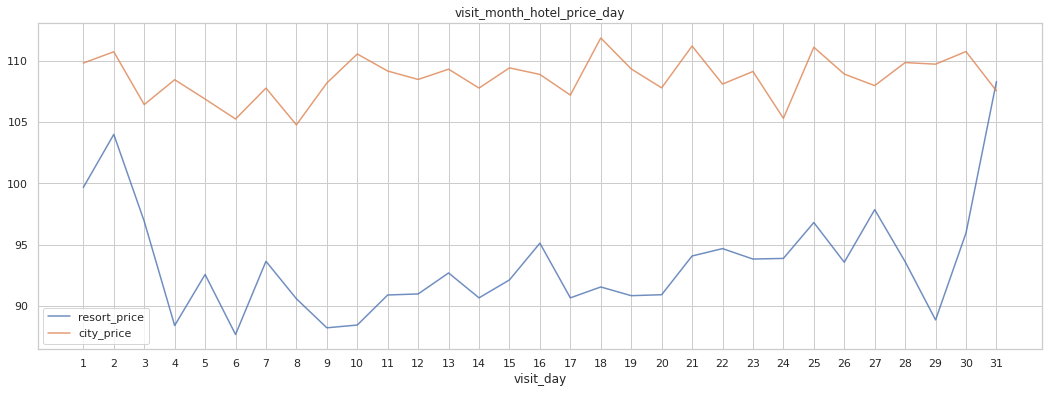

In [35]:
resort_price_d = resort.groupby(['visit_day'])['adr'].mean().reset_index()
city_price_d = city.groupby(['visit_day'])['adr'].mean().reset_index()

com_price_d= resort_price_d.merge(city_price_d, on = 'visit_day')
com_price_d.columns = ['visit_day','resort_price','city_price']
com_price_d = com_price_d.set_index('visit_day')

com_price_d.plot(kind = 'line',
             figsize=(18,6),
             alpha = 0.8)
plt.xticks(range(1,32,1))
plt.title('visit_month_hotel_price_day')
plt.show()
#방문 시점 호텔 price mean (day)

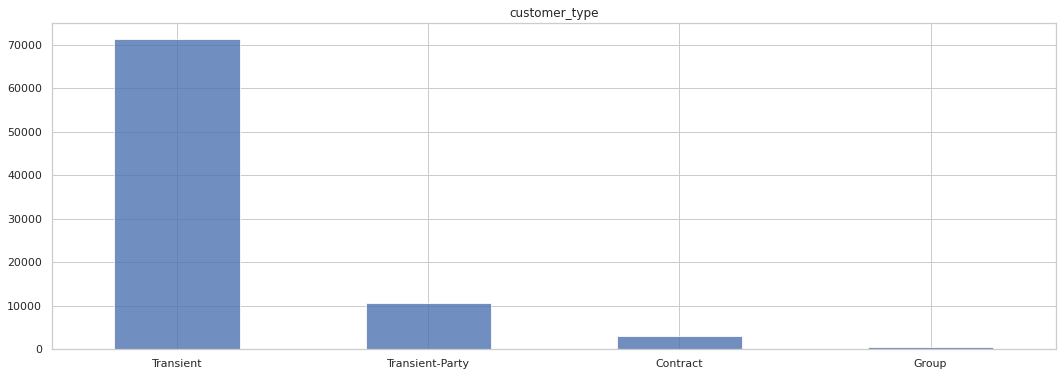

In [36]:
customer = hotel['customer_type'].value_counts()
customer.plot(kind = 'bar',
             figsize=(18,6),
             rot = 0,
             alpha = 0.8)
plt.title('customer_type')
plt.show()

In [37]:
pip install category_encoders

     |████████████████████████████████| 82 kB 416 kB/s 


In [38]:
#모델링을 위한 데이터 정리
hotel['visit_year'] = hotel['reservation_status_date'].dt.year
hotel['visit_month'] = hotel['reservation_status_date'].dt.month
hotel['visit_day'] = hotel['reservation_status_date'].dt.day

hotel_data = hotel.drop(columns=['reservation_status_date'])

hotel_data['arrival_date_year'] = hotel_data['arrival_date_year'].map({2015 : 0,
                                                                       2016 : 1,
                                                                       2017 : 2})
hotel_data['visit_year'] = hotel_data['visit_year'].map({2014 : 0,
                                                         2015 : 1,
                                                         2016 : 2,
                                                         2017 : 3})

hotel_data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,visit_year,visit_month,visit_day
0,Resort Hotel,0,342,0,7,1,0,0,2,0,0,BB,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0,Transient,0.00,0,0,Check-Out,1,7,1
1,Resort Hotel,0,737,0,7,1,0,0,2,0,0,BB,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0,Transient,0.00,0,0,Check-Out,1,7,1
2,Resort Hotel,0,7,0,7,1,0,1,1,0,0,BB,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0,Transient,75.00,0,0,Check-Out,1,7,2
3,Resort Hotel,0,13,0,7,1,0,1,1,0,0,BB,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.00,0,0,Check-Out,1,7,2
4,Resort Hotel,0,14,0,7,1,0,2,2,0,0,BB,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,1,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2,8,30,2,5,2,0,0,BB,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,0,Transient,96.14,0,0,Check-Out,3,9,6
119386,City Hotel,0,102,2,8,31,2,5,3,0,0,BB,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,0,Transient,225.43,0,2,Check-Out,3,9,7
119387,City Hotel,0,34,2,8,31,2,5,2,0,0,BB,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0,Transient,157.71,0,4,Check-Out,3,9,7
119388,City Hotel,0,109,2,8,31,2,5,2,0,0,BB,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,0,Transient,104.40,0,0,Check-Out,3,9,7


In [39]:
from sklearn.model_selection import train_test_split
from category_encoders import OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn import metrics

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [40]:
y = hotel_data['is_canceled']
X = hotel_data.drop(columns=['is_canceled'])

In [41]:
#훈련데이터 , 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.3,
                                                    random_state = 42)

In [42]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((59936, 30), (25688, 30), (59936,), (25688,))

In [43]:
#로지스틱 회귀 모델링 검증
model_lr = make_pipeline(
                         OrdinalEncoder(),
                         LogisticRegression(solver = 'saga',
                                            penalty = 'l2',
                                            random_state = 42,
                                            )
                         )
model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
clf_report_lr = classification_report(y_test, y_pred_lr)
print(accuracy_lr,'\n', clf_report_lr)

0.9713095608844596 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     18546
           1       1.00      0.90      0.95      7142

    accuracy                           0.97     25688
   macro avg       0.98      0.95      0.96     25688
weighted avg       0.97      0.97      0.97     25688



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


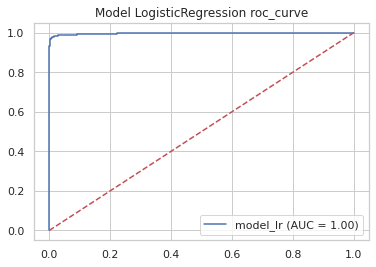

In [44]:
#로지스틱 회귀 모델 ROC 커브
roc_auc_lr = metrics.roc_auc_score(y_test, model_lr.predict_proba(X_test)[:,1])

fpr , tpr , thresholds = roc_curve(y_test, model_lr.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr, 'b', label ='model_lr (AUC = %0.2f)'% roc_auc_lr)

plt.plot([0,1],[0,1],'r--')

plt.title('Model LogisticRegression roc_curve')
plt.legend()
plt.show()

In [45]:
#랜덤포레스트 모델링 검증
model_rf = make_pipeline(OrdinalEncoder(),
                         RandomForestClassifier()
                         )
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
clf_report_rf = classification_report(y_test, y_pred_rf)
print(accuracy_rf,'\n',clf_report_rf)

1.0 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18546
           1       1.00      1.00      1.00      7142

    accuracy                           1.00     25688
   macro avg       1.00      1.00      1.00     25688
weighted avg       1.00      1.00      1.00     25688



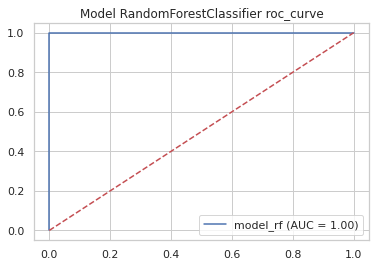

In [46]:
#랜덤포레스트 모델 ROC 커브
roc_auc_rf = metrics.roc_auc_score(y_test, model_rf.predict_proba(X_test)[:,1])

fpr , tpr , thresholds = roc_curve(y_test, model_rf.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr, 'b', label ='model_rf (AUC = %0.2f)'% roc_auc_rf)

plt.plot([0,1],[0,1],'r--')

plt.title('Model RandomForestClassifier roc_curve')
plt.legend()
plt.show()

In [47]:
#XGB 모델링 검증
model_xgb = make_pipeline(OrdinalEncoder(),
                          XGBClassifier()
                          )

model_xgb.fit(X_train, y_train)

y_pred_xgb = model_xgb.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
clf_report_xgb = classification_report(y_test, y_pred_xgb)
print(accuracy_xgb,'\n',clf_report_xgb)

1.0 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18546
           1       1.00      1.00      1.00      7142

    accuracy                           1.00     25688
   macro avg       1.00      1.00      1.00     25688
weighted avg       1.00      1.00      1.00     25688



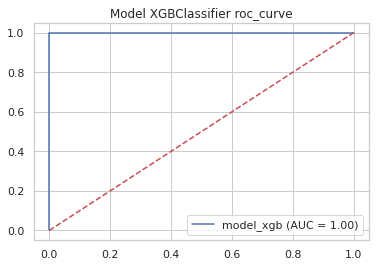

In [48]:
#XGB 모델 ROC 커브
roc_auc_xgb = metrics.roc_auc_score(y_test, model_xgb.predict_proba(X_test)[:,1])

fpr , tpr , thresholds = roc_curve(y_test, model_xgb.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr, 'b', label ='model_xgb (AUC = %0.2f)'% roc_auc_xgb)

plt.plot([0,1],[0,1],'r--')

plt.title('Model XGBClassifier roc_curve')
plt.legend()
plt.show()